In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster import SilhouetteVisualizer

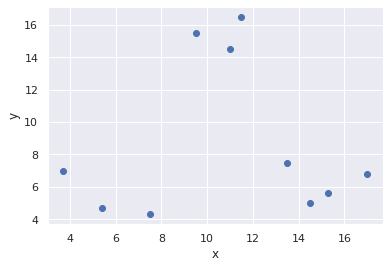

In [6]:
# Первый график

x = [11.5, 9.5, 11, 13.5, 17, 15.3, 14.5, 3.7, 5.4, 7.5]
y = [16.5, 15.5, 14.5, 7.5, 6.8, 5.6, 5, 7, 4.7, 4.3]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
# Промежуточный график для опредения "локтя"

VSP = {"x":pd.Series(x),
     "y": pd.Series(y)}

VSP = pd.DataFrame(VSP)
VSP

,x,y
0,11.5,16.5
1,9.5,15.5
2,11.0,14.5
3,13.5,7.5
4,17.0,6.8
5,15.3,5.6
6,14.5,5.0
7,3.7,7.0
8,5.4,4.7
9,7.5,4.3


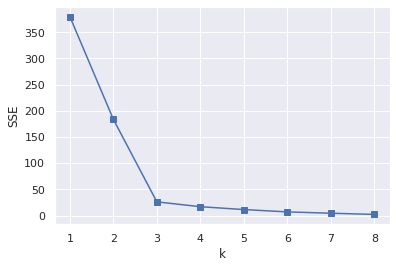

In [15]:
SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(VSP)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f63758010d0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=3))

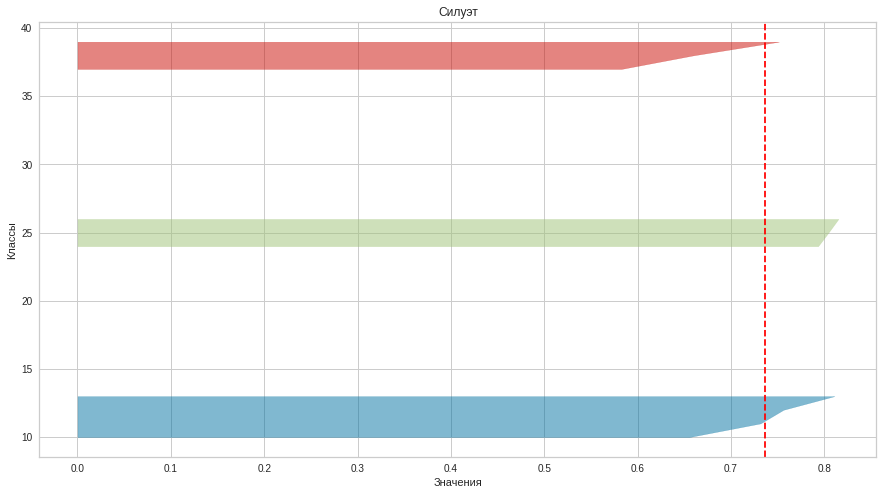

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(VSP)
Y_pred = kmeans.labels_
Y_pred

fig, ax = plt.subplots(figsize=(15,8))
VSP['cluster'] = Y_pred
# 

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
# ax.set_title('Силуэт')
plt.title('Силуэт')
plt.xlabel("Значения")
plt.ylabel("Классы")

visualizer.fit(VSP)
# visualizer.show()

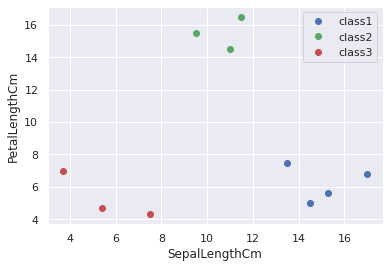

In [22]:
# VSP[строки, столбцы]
# plt.plot(x,y)
plt.plot(VSP[VSP['cluster']==0]['x'], VSP[VSP['cluster']==0]['y'], 'bo', label='class1')

plt.plot(VSP[VSP['cluster']==1]['x'], VSP[VSP['cluster']==1]['y'], 'go', label='class2')

plt.plot(VSP[VSP['cluster']==2]['x'], VSP[VSP['cluster']==2]['y'], 'ro', label='class3')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc=0)
plt.show()